In [ ]:
import tweepy as tw
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import os
import pandas as pd
from datetime import date

In [ ]:
today = date.today()
end_date = today
print(end_date)

2022-07-29


In [ ]:
search_term = "#nothingphone1"
from_date = '2022-01-09'

In [ ]:
os.system(f"snscrape--since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link']) 
  counter = df.size

print ( 'Number Of Tweets : '+ str (counter))

Number Of Tweets : 0


In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('[#nothingphone1] since:2022-06-12 until:2022-07-11').get_items()):
    if i>100000:
        break
    tweets_list2.append([tweet.date, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_before_launch = pd.DataFrame(tweets_list2, columns=['Datetime', 'Text'])


In [ ]:
tweets_before_launch['Text'][879]

'Nothing Phone (1)\n50 MP Sony IMX766, ƒ/1.88 aperture, 1/1.56” sensor size, 10-bit color videos\nDual OIS and EIS stabilisation\n114-degree FOV\nNight Mode and Scene Detection\n#Nothing #NothingPhone1'

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list3 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('[#nothingphone1] since:2022-07-12 until:2022-07-30').get_items()):
    if i>100000:
        break
    tweets_list3.append([tweet.date, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_after_launch = pd.DataFrame(tweets_list3, columns=['Datetime', 'Text'])

In [5]:
tb = tweets_after_launch.to_csv('tb.csv' , index = False)

In [25]:
tweets_after_launch['Text'][5667]

'#DearNothing  No problem for not sending review  unit to South creators, You lost respect from south india. Till now we have interest on #NothingPhone1 But now sorry  your phone is not upto the mark for South Indian people. https://t.co/ACWNAHVpuf'

In [26]:
df = pd.read_csv('/content/tl.csv')

In [27]:
df.head()

,Datetime,Text
0,2022-07-10 23:57:48+00:00,#NothingPhone1 event this week.\n\n#iOS16Publi...
1,2022-07-10 23:42:01+00:00,#Nothing #NothingPhone1 #Unboxing #technology\...
2,2022-07-10 23:14:54+00:00,@91mobiles Would love to get ahold of a #Nothi...
3,2022-07-10 22:54:35+00:00,Many mighty Yotuber can't wait to lunch day o...
4,2022-07-10 22:38:06+00:00,Last chance to skip the preorder waitlist to g...


In [35]:
df.Text[67]

'@nothing Exclusive 2 days 😍\n\nWhy nothing changes the parrot?\n\n#Nothing #NothingPhone1 \n@nothing🐦 @getpeid 📱'

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

decided to delete nothing phone 1 in all the tweets and mentions and links

In [63]:

import re
import seaborn as sns

from textblob import TextBlob
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

In [67]:
def data_pre(text):
  text = text.lower()
  text = re.sub(r"https\S+","",text,flags=re.MULTILINE)

  text = re.sub(r'\@w+|\#',"",text)

  text = re.sub(r'[^\w\s]' , "", text)

  text_tokens = word_tokenize(text)

  filtered_text = [w for w in text_tokens if not w in stop_words]


  return " ".join(filtered_text)

In [91]:
df['Text'] = df['Text'].apply(data_pre)

In [93]:
df.Text[3477]

'seems little bit weird nothingphone1 launched us nothing put phone american youtubers hand first'

In [73]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [74]:
df['Text'] = df['Text'].apply(lambda x: stemming(x))

In [76]:
df

,Datetime,Text
0,2022-07-10 23:57:48+00:00,nothingphone1 event week ios16publicbeta comin...
1,2022-07-10 23:42:01+00:00,nothing nothingphone1 unboxing technology come...
2,2022-07-10 23:14:54+00:00,91mobiles would love get ahold nothingphone1
3,2022-07-10 22:54:35+00:00,many mighty yotuber cant wait lunch day phone ...
4,2022-07-10 22:38:06+00:00,last chance skip preorder waitlist get nothing...
...,...,...
5713,2022-06-12 08:59:43+00:00,nankai university china cloned pig using artif...
5714,2022-06-12 08:37:08+00:00,yep absolutely nothing nothingphone1 nothing g...
5715,2022-06-12 08:04:39+00:00,nothing phone 1 details camera storage ram pro...
5716,2022-06-12 05:06:05+00:00,nothing phone 1 launch soon snapdragon 7 gen 1...


In [77]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

In [78]:
df['polarity'] = df['Text'].apply(polarity)

In [79]:
df

,Datetime,Text,polarity
0,2022-07-10 23:57:48+00:00,nothingphone1 event week ios16publicbeta comin...,0.700
1,2022-07-10 23:42:01+00:00,nothing nothingphone1 unboxing technology come...,0.000
2,2022-07-10 23:14:54+00:00,91mobiles would love get ahold nothingphone1,0.500
3,2022-07-10 22:54:35+00:00,many mighty yotuber cant wait lunch day phone ...,0.450
4,2022-07-10 22:38:06+00:00,last chance skip preorder waitlist get nothing...,0.200
...,...,...,...
5713,2022-06-12 08:59:43+00:00,nankai university china cloned pig using artif...,-0.175
5714,2022-06-12 08:37:08+00:00,yep absolutely nothing nothingphone1 nothing g...,0.200
5715,2022-06-12 08:04:39+00:00,nothing phone 1 details camera storage ram pro...,0.000
5716,2022-06-12 05:06:05+00:00,nothing phone 1 launch soon snapdragon 7 gen 1...,0.200


In [80]:
def setiment(label):

  if label < 0:
    return "Negative"

  elif label == 0:
    return "Neutral"

  else:
    return "Positive"    

In [81]:
df['sentiment'] = df['polarity'].apply(setiment)

In [82]:
df

,Datetime,Text,polarity,sentiment
0,2022-07-10 23:57:48+00:00,nothingphone1 event week ios16publicbeta comin...,0.700,Positive
1,2022-07-10 23:42:01+00:00,nothing nothingphone1 unboxing technology come...,0.000,Neutral
2,2022-07-10 23:14:54+00:00,91mobiles would love get ahold nothingphone1,0.500,Positive
3,2022-07-10 22:54:35+00:00,many mighty yotuber cant wait lunch day phone ...,0.450,Positive
4,2022-07-10 22:38:06+00:00,last chance skip preorder waitlist get nothing...,0.200,Positive
...,...,...,...,...
5713,2022-06-12 08:59:43+00:00,nankai university china cloned pig using artif...,-0.175,Negative
5714,2022-06-12 08:37:08+00:00,yep absolutely nothing nothingphone1 nothing g...,0.200,Positive
5715,2022-06-12 08:04:39+00:00,nothing phone 1 details camera storage ram pro...,0.000,Neutral
5716,2022-06-12 05:06:05+00:00,nothing phone 1 launch soon snapdragon 7 gen 1...,0.200,Positive


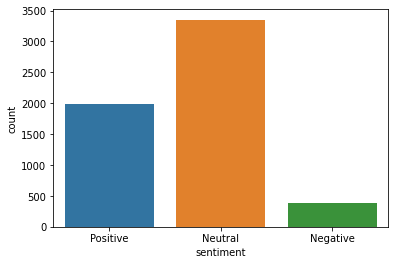

In [83]:
sns.countplot(x = 'sentiment' , data = df)

In [84]:
dff = pd.read_csv('/content/tb.csv')

In [85]:
dff['Text'] = dff['Text'].apply(data_pre)
dff['Text'] = dff['Text'].apply(lambda x: stemming(x))
dff['polarity'] = dff['Text'].apply(polarity)
dff['sentiment'] = dff['polarity'].apply(setiment)

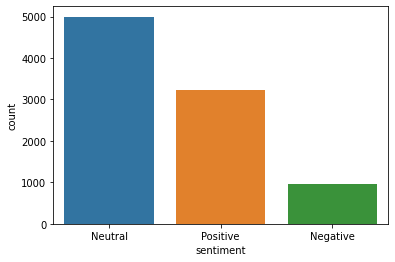

In [86]:
sns.countplot(x = 'sentiment' , data = dff)

In [87]:
dff

,Datetime,Text,polarity,sentiment
0,2022-07-29 23:37:22+00:00,flipkart flipkartsupport hope delivered time 3...,0.000,Neutral
1,2022-07-29 22:13:39+00:00,مهما كان ليلك طويل كل حاجة بتعدي nothingphone1...,0.000,Neutral
2,2022-07-29 21:32:46+00:00,idk whether dont see similarities nothing phon...,0.000,Neutral
3,2022-07-29 20:48:28+00:00,nothing phone jego bateria więc jest tak jakby...,0.000,Neutral
4,2022-07-29 19:47:59+00:00,nothing pocket nothingphone1 nothingphone getpeid,0.000,Neutral
...,...,...,...,...
9183,2022-07-12 00:24:08+00:00,tomorrow nothingphone1,0.000,Neutral
9184,2022-07-12 00:18:35+00:00,nothingevent starting today india 830pm nothin...,0.000,Neutral
9185,2022-07-12 00:14:30+00:00,nothing android personally excited nothing not...,0.375,Positive
9186,2022-07-12 00:13:31+00:00,nothing snapdragon awesome choice snapdragon n...,1.000,Positive


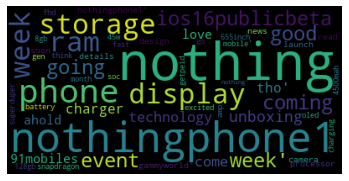

In [89]:
import matplotlib.pyplot as plt


text = df['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

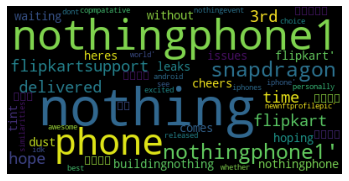

In [90]:
import matplotlib.pyplot as plt


text = dff['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [4]:
from nltk.tokenize import word_tokenize

In [8]:
text_tokens = word_tokenize("nothing pocket        nothingphone1 nothingphone getpeid	")

In [9]:
text_tokens

['nothing', 'pocket', 'nothingphone1', 'nothingphone', 'getpeid']